Inflation Impact Analysis with Python

In [1]:
#Necessary libraries

import pandas as pd             #datacleaning
import plotly.express as px     #data visualization plots
import plotly.graph_objs as go  #data visluaziation chart

In [3]:
#import datasets

inflation_data= pd.read_csv(r"C:\Users\pri13\Downloads\Inflation_Rates_Transformed-1.csv")
excahnge_rate_data= pd.read_csv(r"C:\Users\pri13\Downloads\USD_INR_Exchange_Rates_1980_2024.csv")

In [4]:
inflation_data

,Country,Year,Inflation Rate
0,India,1980,11.3
1,United States,1980,13.5
2,Emerging market and developing economies,1980,26.0
3,India,1981,12.7
4,United States,1981,10.4
...,...,...,...
145,United States,2028,2.1
146,Emerging market and developing economies,2028,4.3
147,India,2029,4.0
148,United States,2029,2.1


In [5]:
excahnge_rate_data

,Year,Average Exchange Rate (INR/USD)
0,2003,45.476087
1,2004,45.188604
2,2005,44.003753
3,2006,45.183561
4,2007,41.192248
5,2008,43.464831
6,2009,48.283335
7,2010,45.621969
8,2011,46.562903
9,2012,53.404276


Merging the datasets to analyze the impact of inflation on exchange rates

In [12]:
# filter the inflation data for India and the United States

inflation_data_df = inflation_data[inflation_data["Country"].isin(["India","United States"])]

In [13]:
inflation_data_df

,Country,Year,Inflation Rate
0,India,1980,11.3
1,United States,1980,13.5
3,India,1981,12.7
4,United States,1981,10.4
6,India,1982,7.7
...,...,...,...
142,United States,2027,2.1
144,India,2028,4.0
145,United States,2028,2.1
147,India,2029,4.0


In [8]:
# pivot the inflation data to have separate columns for India and the United States inflation rates

inflation_pivot_df = inflation_data_df.pivot(index="Year",columns="Country",values="Inflation Rate").reset_index()

In [14]:
inflation_pivot_df

Country,Year,India,United States
0,1980,11.3,13.5
1,1981,12.7,10.4
2,1982,7.7,6.2
3,1983,12.6,3.2
4,1984,6.5,4.4
5,1985,6.3,3.5
6,1986,8.9,1.9
7,1987,9.1,3.6
8,1988,7.2,4.1
9,1989,4.6,4.8


In [9]:
# merge the exchange rates data with the inflation data

merged_df= pd.merge(excahnge_rate_data,inflation_pivot_df, on='Year')

In [10]:
# renaming columns

merged_df.columns = ['Year', 'Exchange Rate (INR/USD)', 'Inflation Rate (India)', 'Inflation Rate (United States)']

In [11]:
merged_df

,Year,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
0,2003,45.476087,4.1,2.3
1,2004,45.188604,4.0,2.7
2,2005,44.003753,3.7,3.4
3,2006,45.183561,6.7,3.2
4,2007,41.192248,5.9,2.9
5,2008,43.464831,9.2,3.8
6,2009,48.283335,10.6,-0.3
7,2010,45.621969,9.4,1.6
8,2011,46.562903,8.1,3.1
9,2012,53.404276,10.0,2.1


The merged dataset now contains the following columns for each year:

Exchange Rate (INR/USD): The average exchange rate of INR to USD.
Inflation Rate (India): The inflation rate for India.
Inflation Rate (United States): The inflation rate for the United States.

Analyzing the trend of inflation rates for both India and the United States alongside the exchange rate

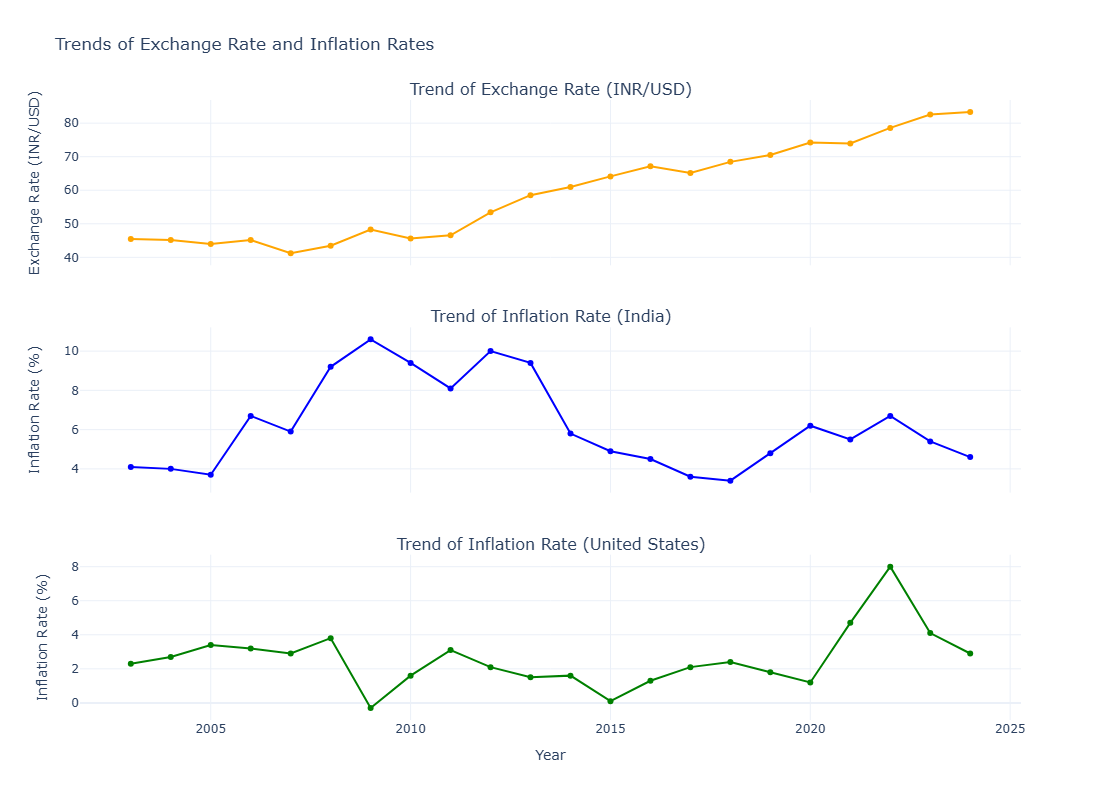

In [19]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=3,cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Trend of Exchange Rate (INR/USD)",
                                    "Trend of Inflation Rate (India)",
                                    "Trend of Inflation Rate (United States)"))

fig.add_trace(go.Scatter(x=merged_df["Year"],y=merged_df["Exchange Rate (INR/USD)"],
                         mode='lines+markers',
                         marker=dict(color='orange'),
                         name='Exchange Rate (INR/USD)'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=merged_df["Year"],y=merged_df["Inflation Rate (India)"],
                         mode='lines+markers',
                         marker=dict(color='blue'),
                         name='Inflation Rate (India)'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=merged_df["Year"],y=merged_df["Inflation Rate (United States)"],
                         mode='lines+markers',
                         marker=dict(color='green'),
                         name='Inflation Rate (United States)'),
              row=3, col=1)

fig.update_layout(height=800,
                  width=900,
                  showlegend=False,
                  title_text="Trends of Exchange Rate and Inflation Rates",
                  xaxis3_title="Year",
                  template='plotly_white')

fig.update_yaxes(title_text="Exchange Rate (INR/USD)", row=1, col=1)
fig.update_yaxes(title_text="Inflation Rate (%)", row=2, col=1)
fig.update_yaxes(title_text="Inflation Rate (%)", row=3, col=1)

fig.show()

The exchange rate shows a general upward trend over the years, which indicates a depreciation of the Indian Rupee against the US Dollar. 

India’s inflation rate has fluctuated with periods of high inflation in early 2000s) and more stable inflation in recent years.

Whereas in United States implicits lower and more stable inflation rates compared to India, with fewer extreme fluctuations.

Correlation Analysis: Relationship between the inflation rates and the exchange rates

In [21]:
correlation_matrix=merged_df[["Exchange Rate (INR/USD)","Inflation Rate (India)","Inflation Rate (United States)"]].corr()
correlation_matrix

,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
Exchange Rate (INR/USD),1.000000,-0.337748,0.235321
Inflation Rate (India),-0.337748,1.000000,-0.120503
Inflation Rate (United States),0.235321,-0.120503,1.000000


Exchange Rate vs. Inflation Rate (India): The correlation coefficient is approximately -0.34, which indicates a weak negative relationship. It suggests that as inflation in India increases, the INR tends to depreciate against the USD, though the relationship is not very strong.

Exchange Rate vs. Inflation Rate (United States): The correlation coefficient is approximately 0.24, which indicates a weak positive relationship. It suggests that higher inflation in the United States might be associated with a depreciation of the USD against the INR, but again, the relationship is not strong.

Inflation Rate (India) vs. Inflation Rate (United States): The correlation between the inflation rates of India and the United States is very weak and negative (-0.12), which indicates that the inflation rates in these two countries do not move together.

Comparative analysis to highlight periods of significant divergence or convergence between the inflation rates and the exchange rates

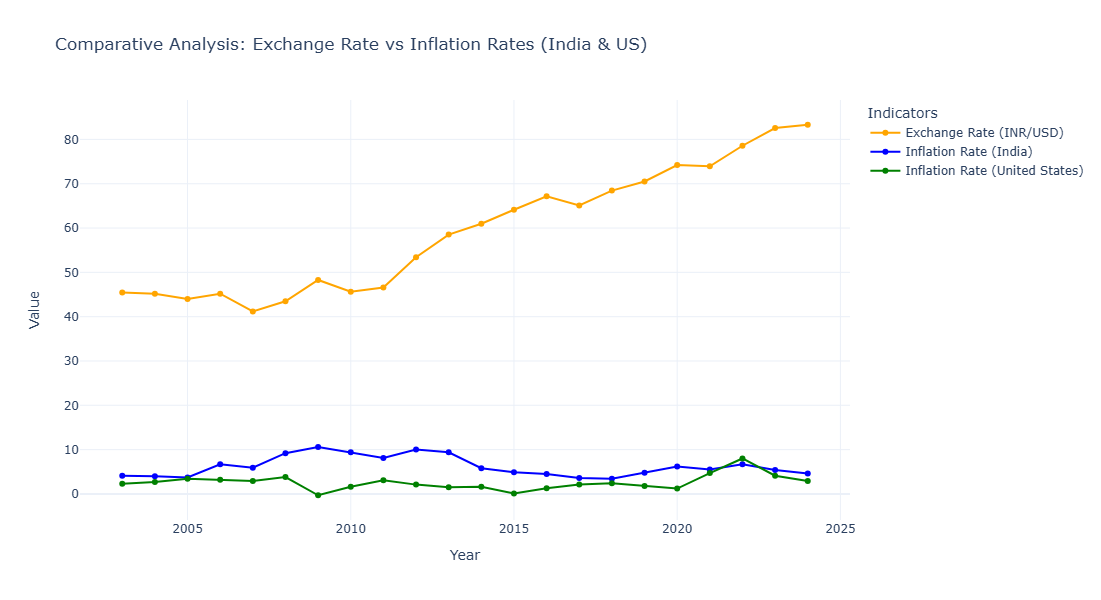

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Exchange Rate (INR/USD)'],
                         mode='lines+markers',
                         name='Exchange Rate (INR/USD)',
                         line=dict(color='orange')))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Inflation Rate (India)'],
                         mode='lines+markers',
                         name='Inflation Rate (India)',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Inflation Rate (United States)'],
                         mode='lines+markers',
                         name='Inflation Rate (United States)',
                         line=dict(color='green')))

fig.update_layout(title='Comparative Analysis: Exchange Rate vs Inflation Rates (India & US)',
                  xaxis_title='Year',
                  yaxis_title='Value',
                  legend_title_text='Indicators',
                  template='plotly_white',
                  height=600,
                  width=1000)

fig.show()

Analyzing Inflation based on the Purchasing Power Parity (PPP)

Expected Exchange Rate = Initial Exchange Rate × ( 1 + Inflation Rate in India / 1 + Inflation Rate in the US)

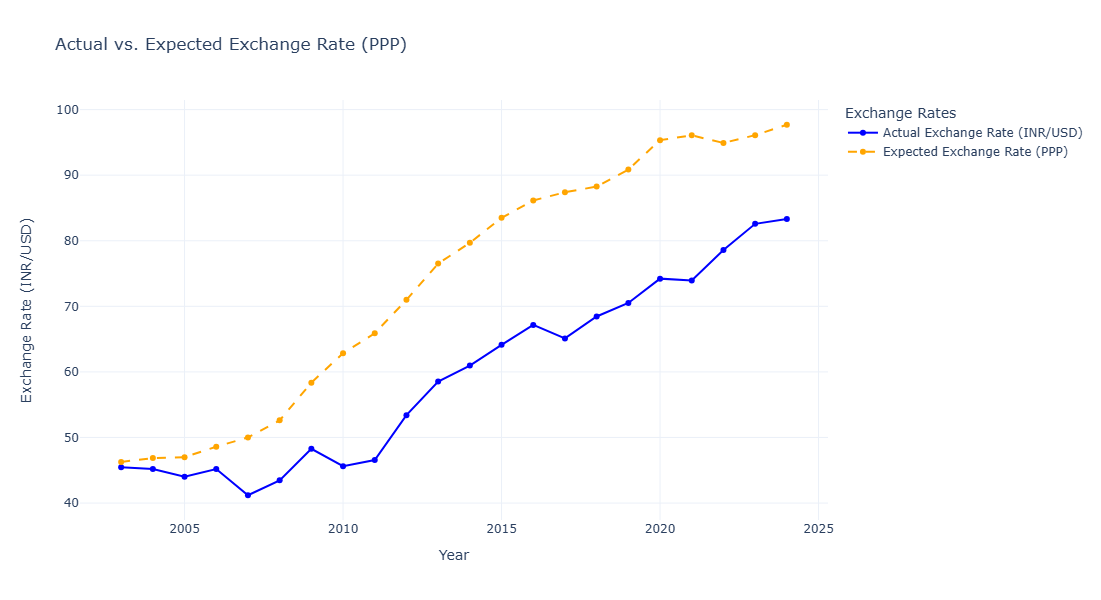

In [24]:
initial_exchange_rate = merged_df['Exchange Rate (INR/USD)'].iloc[0]

# calculate expected exchange rate based on PPP
merged_df['Expected Exchange Rate (PPP)'] = initial_exchange_rate * (
    (1 + merged_df['Inflation Rate (India)'] / 100) / (1 + merged_df['Inflation Rate (United States)'] / 100)
).cumprod()

fig = go.Figure()

# plot actual exchange rate
fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Exchange Rate (INR/USD)'],
                         mode='lines+markers',
                         name='Actual Exchange Rate (INR/USD)',
                         line=dict(color='blue')))

# plot PPP-based expected exchange rate
fig.add_trace(go.Scatter(x=merged_df['Year'],
                         y=merged_df['Expected Exchange Rate (PPP)'],
                         mode='lines+markers',
                         name='Expected Exchange Rate (PPP)',
                         line=dict(color='orange', dash='dash')))

fig.update_layout(title='Actual vs. Expected Exchange Rate (PPP)',
                  xaxis_title='Year',
                  yaxis_title='Exchange Rate (INR/USD)',
                  legend_title_text='Exchange Rates',
                  template='plotly_white',
                  height=600,
                  width=1000)

fig.show()